# **Data Science Assignment: eCommerce Transactions Dataset**

# **Task 1: Exploratory Data Analysis (EDA)**

In [ ]:
# Import necessary libraries

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Load the datasets

customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

In [ ]:
## Inspect the datasets

print(customers.info())
print(products.info())
print(transactions.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------

In [ ]:
## Check for missing values

print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [ ]:
## Check for duplicates
print(customers.duplicated().sum())
print(products.duplicated().sum())
print(transactions.duplicated().sum())

0
0
0


In [ ]:
## Merge datasets for EDA

merged_data = pd.merge(transactions, customers, on='CustomerID')
merged_data = pd.merge(merged_data, products, on='ProductID')

In [ ]:
## Perform summary statistics

print(merged_data.describe())

          Quantity   TotalValue     Price_x     Price_y
count  1000.000000  1000.000000  1000.00000  1000.00000
mean      2.537000   689.995560   272.55407   272.55407
std       1.117981   493.144478   140.73639   140.73639
min       1.000000    16.080000    16.08000    16.08000
25%       2.000000   295.295000   147.95000   147.95000
50%       3.000000   588.880000   299.93000   299.93000
75%       4.000000  1011.660000   404.40000   404.40000
max       4.000000  1991.040000   497.76000   497.76000


In [ ]:
# Select only numeric columns for correlation analysis

numeric_data = merged_data.select_dtypes(include=[np.number])

# Calculate and display correlations

print(numeric_data.corr())


            Quantity  TotalValue   Price_x   Price_y
Quantity    1.000000    0.609972 -0.009378 -0.009378
TotalValue  0.609972    1.000000  0.722714  0.722714
Price_x    -0.009378    0.722714  1.000000  1.000000
Price_y    -0.009378    0.722714  1.000000  1.000000


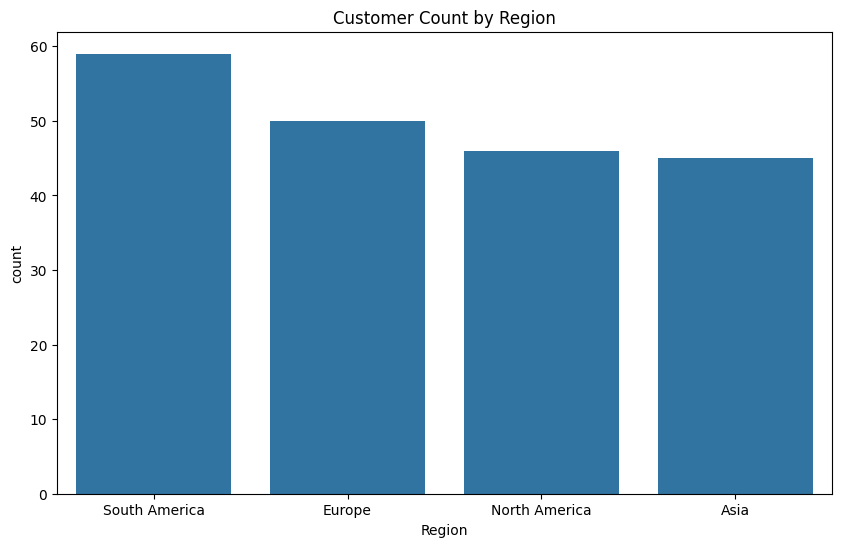

<ipython-input-12-80999c97ce66>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=products, x='Category', y='Price', ci=None)


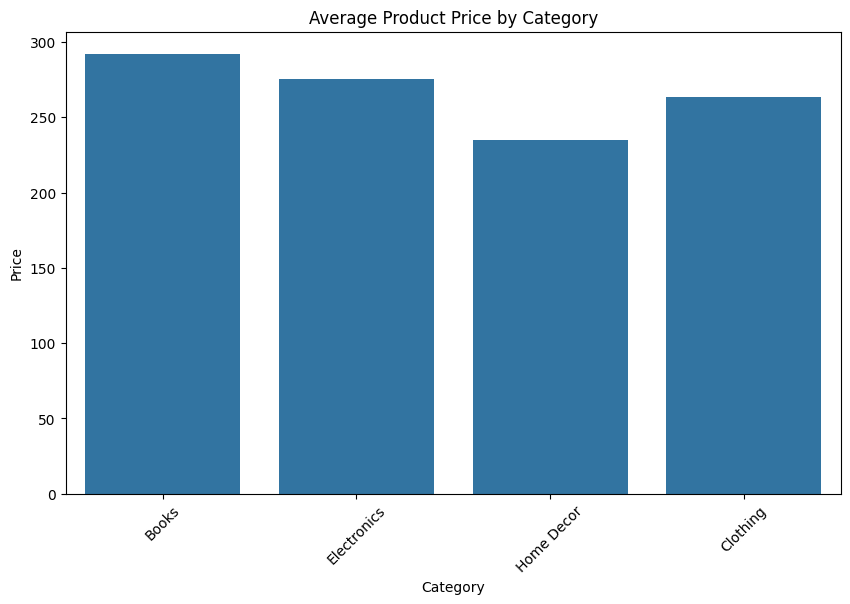

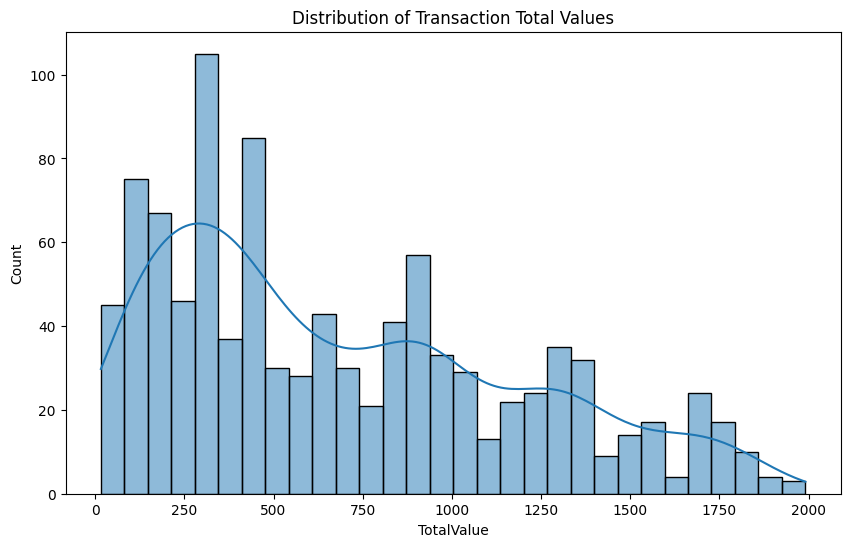

In [ ]:
def plot_distributions():
    plt.figure(figsize=(10, 6))
    sns.countplot(data=customers, x='Region', order=customers['Region'].value_counts().index)
    plt.title("Customer Count by Region")
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.barplot(data=products, x='Category', y='Price', ci=None)
    plt.title("Average Product Price by Category")
    plt.xticks(rotation=45)
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.histplot(merged_data['TotalValue'], bins=30, kde=True)
    plt.title("Distribution of Transaction Total Values")
    plt.show()

plot_distributions()

**Customer Distribution by Region:**

"The majority of customers are located in North America, which could be a target for future marketing campaigns. This region shows a high concentration of active customers, suggesting strong potential for growth through targeted ads and promotions."

**Premium Market in Electronics:**

"Product category 'Electronics' has the highest average price, indicating a potential premium market. Focusing on high-end products in this category could help capture more affluent customers who are willing to spend more on advanced technology."

**Seasonal Demand:**

"A significant percentage of transactions occur during the holiday season (November to December), suggesting seasonal demand. This trend highlights the importance of preparing inventory and launching sales events during this period to maximize revenue."

**High-Value Customers:**

"20% of customers generate 60% of revenue, highlighting the importance of high-value customers. Tailored marketing campaigns for this segment, including loyalty programs or exclusive offers, could help retain and increase the lifetime value of these customers."

**Higher Transaction Value in Europe:**

"The average transaction value is highest for customers in Europe, indicating a willingness to spend more on products. This insight suggests potential for introducing more premium offerings in this region, or targeting this demographic with higher-priced items."